#**Working with the Functional vs. Sequential API**

I'm going to load the Boston Housing dataset again, just for demonstration purposes.

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [24]:
model = []

#*Simple, Feed-forward Topology*

In [33]:
# If you face difficulties with model and layer names conflicting
# e.g., if you've compiled multiple models with the same layer names but different model names, etc.,
# you can wipe it all from memory using these clear commands.

tf.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()

Recall that we could specify a Sequential model as follows...

In [34]:
# Start the model... note that I can 'name' the model as part of this.
model = keras.Sequential(name="boston_housing")

# Add some layers... I can name those too.
# The Sequential API approach forces me to fully connect everything I add to the last layer of what I've done so far.
# It only alows a single pipe from input to output, of variable width.
#model.add(layers.Input(shape=(train_data.shape[1],), name="inputs")) -- notice I don't have to declare the input layer dimensions up front with Sequential API.
model.add(layers.Dense(8, activation="relu",name="first_hidden"))
model.add(layers.Dense(8, activation="relu",name="second_hidden"))
model.add(layers.Dense(1,name="output"))

# Compile the model.
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

# Draw a picture of the model...
#keras.utils.plot_model(model,show_shapes=True)
model.summary()

Model: "boston_housing"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ first_hidden (Dense)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_hidden (Dense)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = model.fit(train_data, train_targets, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 10126.1240 - mae: 98.8143 - val_loss: 5730.1006 - val_mae: 74.5076
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5204.8472 - mae: 70.4041 - val_loss: 3946.0645 - val_mae: 61.3831
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3665.0647 - mae: 58.5287 - val_loss: 2777.7778 - val_mae: 51.0258
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2595.2776 - mae: 48.8523 - val_loss: 2056.1807 - val_mae: 43.5949
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1951.2725 - mae: 42.1235 - val_loss: 1601.7635 - val_mae: 38.3596
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1616.8855 - mae: 38.1768 - val_loss: 1324.4562 - val_mae: 34.8280
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1309.5942 - mae: 34.2883 - val_loss: 1110.7299 - val_mae: 31.8541
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1147.4625 - mae: 32.0175 - val_loss: 951.7631 - val_mae: 29.4246
E

We can specify the exact same model using the Functional API, as follows...

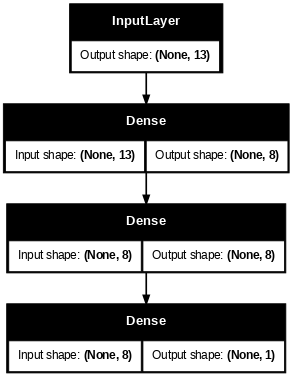

In [37]:
# I define my input layer, with shape = number of predictors in the data.
inputs = keras.layers.Input(shape=(train_data.shape[1],),name="inputs_v2")

# I then define the first hidden layer, which is connected to the prior input layer.
# I can connect the input layer to this, and I could connect some other layer...
first_hidden = keras.layers.Dense(8, activation="relu", name="first_hidden_v2")(inputs)
second_hidden = keras.layers.Dense(8, activation="relu", name="second_hidden_v2")(first_hidden)

# I then define my output layer, which connects to the hidden layer.
output = keras.layers.Dense(1, name="output_v2")(second_hidden)

# Finally, I feed the defined layer structure into a Keras model.
model = keras.Model(name="boston_housing_v2",inputs=[inputs],outputs=[output]) # be careful with what you name your model... spaces are a no-no

# Draw a picture of the model.
keras.utils.plot_model(model,show_shapes=True, dpi=60) # DPI controls the scale of the image when it renders.

#*More Complex Toplogy with Functional API*

Now we can use the functional API to make almost any topology we want, mixing and matching layers, and creating whatever branching logic we like...

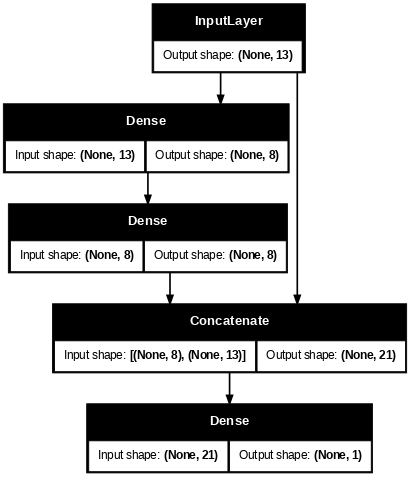

In [38]:
# I define my input layer, with shape = number of predictors in the data.
inputs_1 = keras.layers.Input(shape=(train_data.shape[1],),name="inputs_v3")

# I then define the first hidden layer, which is connected to the prior input layer.
# I can connect the input layer to this, and I could connect some other layer...
one_one_hidden = keras.layers.Dense(8, activation="relu", name="branch_one_one")(inputs)
one_two_hidden = keras.layers.Dense(8, activation="relu", name="branch_one_two")(one_one_hidden)

# I then define my output layer, which takes input from the prior set of hidden layers, in addition to taking the inputs directly as well.
# This is what's known as a residual connection.
merge = keras.layers.Concatenate()([one_two_hidden,inputs])
output = keras.layers.Dense(1, name="output_v3")(merge)

# Finally, I feed the defined layer structure into a Keras model.
model = keras.Model(name="boston_housing_v3",inputs=[inputs],outputs=[output])

# Draw a picture of the model.
keras.utils.plot_model(model,show_shapes=True,dpi=60)

For kicks, let's see how this model performs on the Boston Housing data. First, let's wrap the model build code inside a build function. Note that I'm adding a batch norm layer to whiten the inputs.

In [44]:
def build_model(n_predictors=13):
    # I define my input layer, with shape = number of predictors in the data.
    inputs = keras.layers.Input(shape=(n_predictors,),name="inputs_v4")
    norm = keras.layers.BatchNormalization(center=True)(inputs)

    # I then define the first hidden layer, which is connected to the prior input layer.
    # I can connect the input layer to this, and I could connect some other layer...
    one_one_hidden = keras.layers.Dense(8, activation="relu", name="branch_one_one_v4")(norm)
    one_two_hidden = keras.layers.Dense(8, activation="relu", name="branch_one_two_v4")(one_one_hidden)

    # I then define my output layer, which takes input from the prior set of hidden layers, in addition to taking the inputs directly as well.
    merge = keras.layers.Concatenate()([one_two_hidden,norm])
    output = keras.layers.Dense(1, name="output_v4")(merge)

    # Finally, I feed the defined layer structure into a Keras model.
    model = keras.Model(inputs=[inputs],outputs=[output],name="boston_housing_v4")

    model.compile(optimizer="rmsprop",loss="mae",metrics=['mae'])
    return model

And, let's do the same cross-validation we did last time...

In [45]:
k = 3
num_val_samples = len(train_data) // k # floor division (i.e., round down to nearest integer.)
num_epochs = 150
batch_size = 25
all_mae_histories = []

print("In total, we have",len(train_data),"training observations.")
print("With a k of",k,"we have",num_val_samples,"observations per fold.\n")

for i in range(k): # the folds are going to be indexed 0 through 3 if k = 4
    print("Processing fold #:",i)
    # if I slice past the end of the array, it just gives me what it can find! No errors.
    # This is important here, because the last fold won't produce an error, despite our slice going well beyond the end of the array.
    print("Validation data includes observations",i*num_val_samples,"through",(i+1)*num_val_samples-1) # minus 1 because a slice is up to and not including the second index.
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    print("Training data includes observations 0 through",i*num_val_samples-1,"joined with observations",(i+1)*num_val_samples,"through the final observation.\n")
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit([partial_train_data], [partial_train_targets],
                        validation_data=([val_data], [val_targets]),
                        epochs=num_epochs, batch_size=batch_size, verbose=1)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In total, we have 404 training observations.
With a k of 3 we have 134 observations per fold.

Processing fold #: 0
Validation data includes observations 0 through 133
Training data includes observations 0 through -1 joined with observations 134 through the final observation.

Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 22.7227 - mae: 22.7227 - val_loss: 20.7582 - val_mae: 20.7582
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.2905 - mae: 22.2905 - val_loss: 20.5394 - val_mae: 20.5394
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.0843 - mae: 22.0843 - val_loss: 20.3852 - val_mae: 20.3852
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.5862 - mae: 22.5862 - val_loss: 20.1850 - val_mae: 20.1850
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21.7000 - mae: 21.7000 - val_loss: 19.9703 - val_mae: 19.9703
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 21.0563 - mae: 21.0563 - val_loss: 19.7331 - val_mae: 

And, finally, plot the loss over the training process...

3.0248964627583823


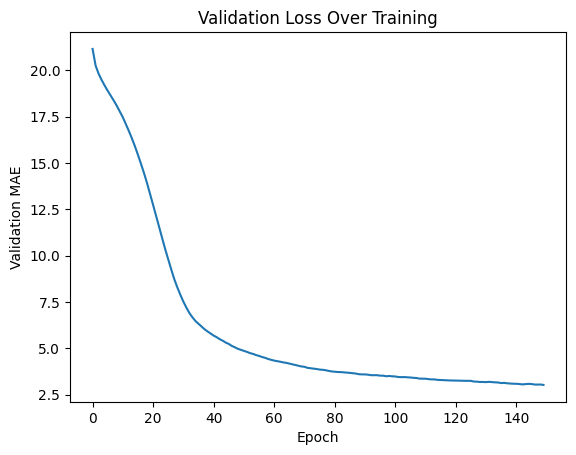

In [46]:
import matplotlib.pyplot as plt

# The final cross-fold average MAE in our training was about $2,900.
print(average_mae_history[-1])

plt.plot(average_mae_history)
plt.ylabel('Validation MAE')
plt.xlabel('Epoch')
plt.title('Validation Loss Over Training')
plt.show()